In [1]:
import numpy as np
import matplotlib.pyplot as plt

import concave_enclosed_csf_list
import _image_processing
import _image_curve
import _utils

In [2]:
import importlib
importlib.reload(concave_enclosed_csf_list)

<module 'concave_enclosed_csf_list' from 'C:\\Users\\ghage\\PycharmProjects\\enclosedcurveshorteningflow\\concave_enclosed_csf_list.py'>

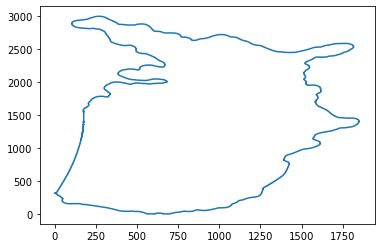

In [13]:
im = _image_processing.load_image(r"C:/Users/ghage/PycharmProjects/morphoscale/lib/polygon_test_shapes/heart.bmp")
im = _image_processing.load_image(
    r"C:/Users/ghage/PycharmProjects/enclosedcurveshorteningflow/lib/silhouettes/opened/united-states-silhouette.jpg")
im = _image_processing.smooth_image(im, 10)
curve = _image_curve.ImageCurve(im).curve()
plt.plot(*curve.transpose())

In [18]:
curve_obj = concave_enclosed_csf_list.ConcaveEnclosedCSFList(curve, 
                                                             max_iterations=1000,
                                                             refresh_interval=10, 
                                                             save_interval=10)

In [19]:
curve_obj.run()

Iteration: 0, Concavity:  1470.95, Area to original %:  100.00
Iteration: 10, Concavity:  58.64, Area to original %:  99.13
Iteration: 20, Concavity:  42.88, Area to original %:  98.22
Iteration: 30, Concavity:  31.13, Area to original %:  97.25
Iteration: 40, Concavity:  23.35, Area to original %:  96.25
Iteration: 50, Concavity:  18.94, Area to original %:  95.26
Iteration: 60, Concavity:  16.53, Area to original %:  94.33
Iteration: 70, Concavity:  15.13, Area to original %:  93.46
Iteration: 80, Concavity:  14.16, Area to original %:  92.64
Iteration: 90, Concavity:  13.45, Area to original %:  91.84
Iteration: 100, Concavity:  12.90, Area to original %:  91.06
Iteration: 110, Concavity:  12.42, Area to original %:  90.29
Iteration: 120, Concavity:  12.01, Area to original %:  89.53
Iteration: 130, Concavity:  11.66, Area to original %:  88.78
Iteration: 140, Concavity:  11.35, Area to original %:  88.04
Iteration: 150, Concavity:  11.09, Area to original %:  87.32
Iteration: 160, 

In [24]:
len(curve_obj.curves)

101

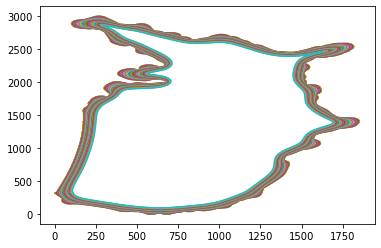

In [28]:
_ =[plt.plot(*curve.transpose()) for curve in curve_obj.curves[:30]]

In [33]:
l = [curve_obj.curr_curve]

In [34]:
len(l)

1